## Basic Statistics

### 1. Measure of Center
Usually Median is better than mean when comes to skewed data.
Mean is easily impacted by outlier

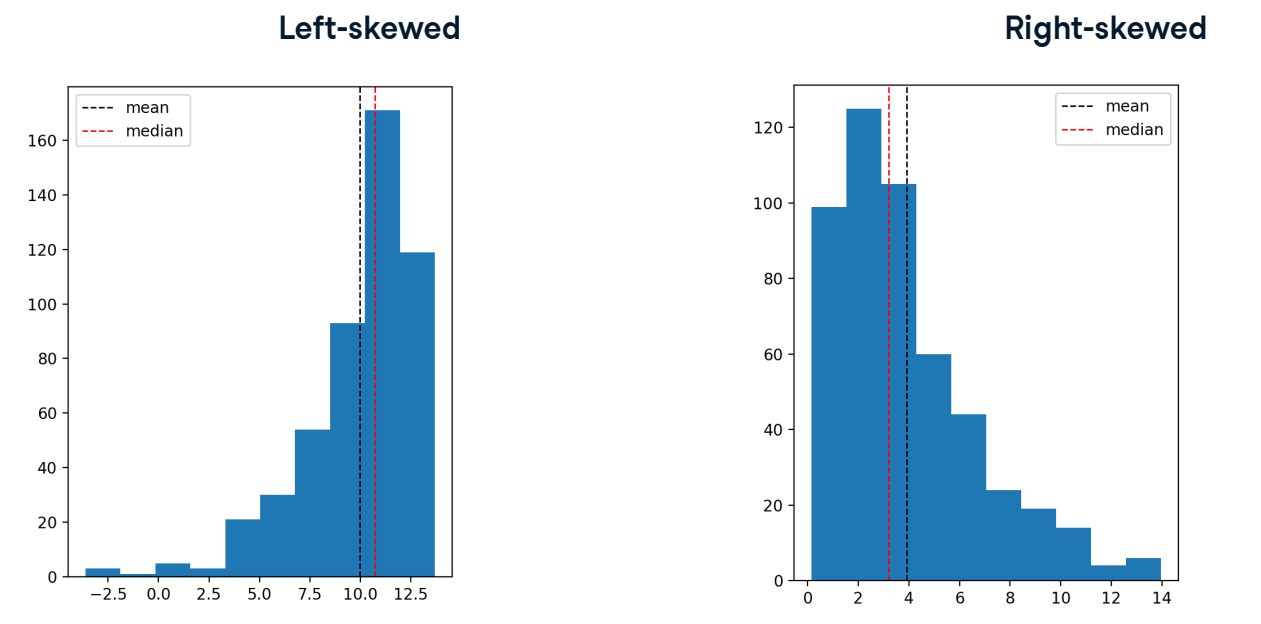

### 2. Measure of spread
Measure how spread the data is from the center
All the following measures can be done in one line:
``df.describe()``
#### Variance
Average distance from each data point to the data's mean

In [ ]:
data = {
    'Scores': [85, 90, 78, 92, 88, 76, 95, 89, 84, 91]
}
df = pd.DataFrame(data)
# Step 2: Calculate the mean (average) of the 'Scores' column
mean_score = df['Scores'].mean()

# Step 3: Subtract the mean from each score to get the deviation from the mean
df['Deviation'] = df['Scores'] - mean_score

# Step 4: Square each deviation to eliminate negative values
df['Squared Deviation'] = df['Deviation'] ** 2

# Step 5: Sum all the squared deviations
sum_squared_deviation = df['Squared Deviation'].sum()

# Step 6: Calculate the variance
# For sample variance, divide by (n - 1), where n is the number of observations
n = len(df['Scores'])  # Number of observations
variance = sum_squared_deviation / (n - 1)
#Or
pandas_variance = df['Scores'].var() # By default ddof = 0

# Optional: Calculate population variance by dividing by n instead of (n - 1)
population_variance = sum_squared_deviation / n

# Optional: Verify population variance using Pandas' var() with ddof=0
pandas_population_variance = df['Scores'].var(ddof=0) #* ddof=1 is sample variance

#### Standard Deviation

In [ ]:
np.sqrt(np.var(msleepl['sleep_total'],ddof=1))
np.std(msleepl['sleep_total'],ddof=1)

#### Mean Absolute Deviation (MAD)

In [ ]:
dists = msleep['sleep total']- np.mean(msleep['sleep total'])
np.mean(np.abs(dists))

#### Quartiles

In [ ]:
np.quantile(msleep['sleep_total'],0.5)
np.quantile(msleep['sleep_total'],[0,0.25,0.5,0.75,1])
# Boxplot to show Quartiles
plt.boxplot(msleep['sleep_total'])
# Quantiles using np.linspace()
np.quantile(msleep['sleep_total'],[0,0.2,0.4,0.6,0.8,1])
#* np.linspace(start,stop,num) , num = parts +1
np.quantile(msleep['sleep total'],np.linspace(0,1,5))



#### Interquartile range (lQR) - Measure the outlier
Height of the box in a boxplot
**Outlier**: A data point is an outlier if:
data < Q1-1.5 * IQR 
or
data > Q3+1.5 * IQR

In [ ]:
#Baisc calculation
np.quantile(msleep['sleep_total'],0.75)- np.quantile(msleep['sleep_total'], 0.25)
# Alternative with iqr
from scipy.stats import iqr
iqr(msleep['sleep_total'])
# Finding Outliers
lower_threshold = np.quantile(msleep['bodywt'],0.25)- 1.5 * igr
upper_threshold =np.quantile(msleep['bodywt'],0.75)+ 1.5 * iqr
# Or
msleepl[(msleepl['bodywt']<lower threshold | msleep['bodywt']> upper_threshold)]

## Random Number and Probability

### 1. Sampling

In [ ]:

#Use random seed
np.random.seed()
# Generate random number
np.random.rand()
np.random.rand(start_num,end_num)
#Generate integer
np.random.randint(1,7)
# Sample of a dataframe
df.sample() # By default
df.sample(2) #! sample twice , By default replace = false 
df.sample(2,replace = True) # Roll dice twice

### 2. Distributions

#### a. Discrete Distribution离散型分布

In [ ]:
# Sampling with discrete distribution
rolls_10 = die.sample(10, replace = True)
# Visualize a sample
rolls_10['number'].hist(bins = np.linspace(1,7,7))
# Sample of distribution
np.mean(roll_10['number'])
# Theoretical probability distribution
np.mean(die['number'])

**WHen the sample gets bigger, the sample mean will get closer to Theoretical probability**

#### b.Continuous Distribution

##### b.1. Uniform distribution

In [ ]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30) #* uniform.cdf(prob , start , end) start is 0 min , end is 30 min
#* Generating random numbers according to uniform distribution
uniform.rvs(0, 5, size=10) #*(start ,end ,how many numbers)


#### d. The binomial distribution
A single flip:
binom.rvs(# of coins, probability of heads/success, size=# of trials)

In [ ]:
# Flip a coin
from scipy.stats import binom
binom.rvs(1, 0.5, size=1)
# Flip a coin 8 times
binom.rvs(1, 0.5, size=8)
# Flip 8 coins a time
binom.rvs(8, 0.5, size=1)

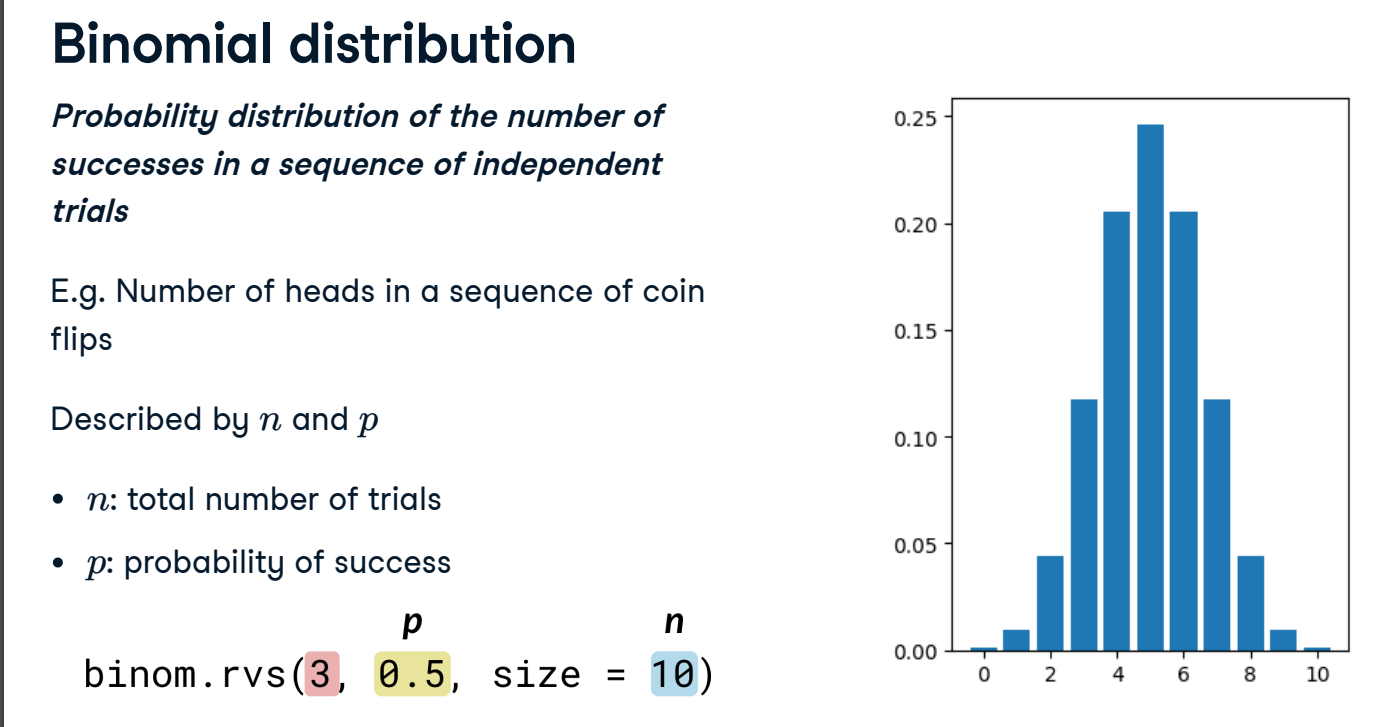

In [ ]:
#* binom.pmf(num heads, num trials, prob of heads)
binom.pmf(7, 10, 0.5)
#* cumulated = binom.cdf(num heads, num trials, prob of heads)
binom.cdf(7, 10, 0.5)

#### e. The Normal Distribution
prob (mean+-1 std) = 68%
prob (mean+-2 std) = 95%
prob (mean+-3 std) = 99%

In [ ]:
# The prob that the sample is smaller than number a
norm.cdf(a,mean,std)
# The number a that the Prob is smaller than
norm.ppf(prob,mean,std)
# The number a  that the Prob is higher than 
norm.ppf((1-prob),mean,std)
# Generate random number
norm.rvs(161,7,size = 10) #* (mean,std,numbers)


#### f. Poisson Distribution
λ = average number of events per time interval
λ (lambda) is the peak of the distribution

In [ ]:
#  If the average number of adoptions per week is 8, what is P( = 5)
from scipy.stats 
import poisson 
poisson.pmf(5, 8)
#  If the average number of adoptions per week is 8, what is P( ≤ 5)
poisson.cdf(5, 8)
# If the average number of adoptions per week is 8, what is P( > 5)
1 - poisson.cdf(5, 8)
# Sampling from a Poisson distribution
poisson.rvs(8, size=10) 

### 3. The Central Limit Theorem
The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases. (Randomly and independently)
